In [3]:
from sagemaker.tensorflow import TensorFlowModel

model = TensorFlowModel(model_data='s3://diversitybucket-v9/models/ssd_mobnet_v9.tar.gz', role='arn:aws:iam::178511518038:role/service-role/AmazonSageMaker-ExecutionRole-20220225T215061',framework_version="2.7.0")

In [4]:
!pip install -U sagemaker

  Using cached sagemaker-2.91.1-py2.py3-none-any.whl
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.88.1
    Uninstalling sagemaker-2.88.1:
      Successfully uninstalled sagemaker-2.88.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [5]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.c5.large')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


----!

In [6]:
!pip install --upgrade pip

  Using cached pip-22.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [7]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)


In [9]:
!pip install tensorflow 

  Using cached tensorflow-2.9.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.46.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
  Using cached libclang-14.0.1-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached We

In [10]:
!pip install tensorflow_hub

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


In [11]:
!pip install tensorflow-object-detection-api

  Using cached tensorflow_object_detection_api-0.1.1-py3-none-any.whl
  Using cached twine-4.0.0-py3-none-any.whl (36 kB)
  Using cached rich-12.4.1-py3-none-any.whl (231 kB)
  Using cached rfc3986-2.0.0-py2.py3-none-any.whl (31 kB)
  Using cached readme_renderer-35.0-py3-none-any.whl (14 kB)
  Using cached pkginfo-1.8.2-py2.py3-none-any.whl (26 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached Pygments-2.12.0-py3-none-any.whl (1.1 MB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Attempting uninstall: pkginfo
    Found existing installation: pkginfo 1.5.0.1
    Uninstalling pkginfo-1.5.0.1:
      Successfully uninstalled pkginfo-1.5.0.1
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.5.2
    Uninstalling Pygments-2.5.2:
      Successfully uninstalled Pygments-2.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

In [19]:
endpoint = predictor.endpoint
endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'tensorflow-inference-2022-05-20-16-11-56-083'

In [ ]:
import boto3

session = boto3.Session( 
         aws_access_key_id='<your_access_key_id>', 
         aws_secret_access_key='<your_secret_access_key>')


#Then use the session to get the resource
s3 = session.resource('s3')

my_bucket = s3.Bucket('stackvidhya')

for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object.key)

In [20]:
image_list=["shutterstock_57026224.jpg","shutterstock_126636809.jpg","shutterstock_116232448.jpg","shutterstock_1661728_rotated.jpg"]

In [21]:
image = image_list[3]

In [22]:
image_content=cv2.imread(image,1)

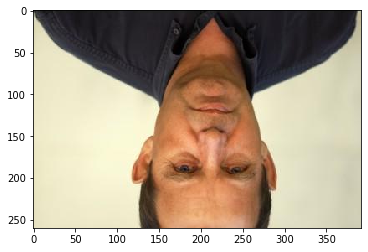

In [23]:
#%matplotlib inline
plt.imshow(cv2.cvtColor(image_content, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
image_for_pred = sample_utils.image_file_to_tensor(image)

In [25]:
result = predictor.predict(image_for_pred)

In [26]:
my_detections = np.array(result['predictions'][0]['detection_boxes'])
my_scores=np.array(result['predictions'][0]['detection_scores'])
my_classes=([int(x) for x in result['predictions'][0]['detection_classes']])
my_classes=np.array(my_classes)


In [27]:
label_id_offset = 1

In [28]:
category_label={'name':'face',
id:1
}

In [29]:
image_np_with_detections_resize = cv2.resize(image_content, (image_content.shape[1],image_content.shape[0]), interpolation = cv2.INTER_AREA)

In [30]:
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections_resize,
            my_detections,
            my_classes-label_id_offset,
            my_scores,
            category_label,
            use_normalized_coordinates=True,
            min_score_thresh=.6,
            agnostic_mode=False)

array([[[ 68,  70,  70],
        [ 50,  52,  52],
        [ 43,  43,  43],
        ...,
        [156, 174, 173],
        [162, 183, 181],
        [162, 184, 182]],

       [[ 93,  95,  95],
        [ 60,  62,  62],
        [ 40,  40,  40],
        ...,
        [160, 178, 177],
        [162, 183, 181],
        [159, 181, 179]],

       [[135, 137, 137],
        [ 86,  88,  88],
        [ 47,  47,  47],
        ...,
        [167, 185, 184],
        [164, 185, 183],
        [157, 179, 177]],

       ...,

       [[192, 224, 229],
        [192, 224, 229],
        [192, 224, 229],
        ...,
        [181, 204, 206],
        [181, 204, 206],
        [181, 204, 206]],

       [[192, 224, 229],
        [192, 224, 229],
        [192, 224, 229],
        ...,
        [181, 204, 206],
        [181, 204, 206],
        [181, 204, 206]],

       [[192, 224, 229],
        [192, 224, 229],
        [192, 224, 229],
        ...,
        [181, 204, 206],
        [181, 204, 206],
        [181, 204, 206]]

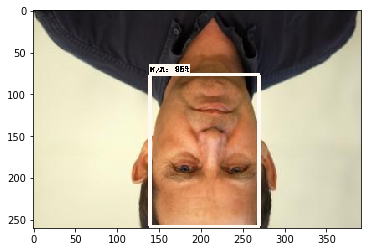

In [31]:
plt.imshow(image_np_with_detections_resize)
plt.imshow(cv2.cvtColor(image_np_with_detections_resize, cv2.COLOR_BGR2RGB))
plt.savefig(image+"_withlabel.jpg")

In [32]:
import boto3

s3 = boto3.resource('s3')
s3.meta.client.upload_file(image+"_withlabel.jpg", 'diversitybucket-v9', image+"_withlabel.jpg")

In [33]:
my_scores

array([0.95103025, 0.08430147, 0.0606834 , 0.05353159, 0.05209923,
       0.0518989 , 0.03515172, 0.03266948, 0.03119686, 0.03045359,
       0.02941194, 0.02910981, 0.02843723, 0.02749518, 0.02634132,
       0.02562284, 0.02561149, 0.02501255, 0.02431831, 0.02335501,
       0.02281019, 0.02260682, 0.02246621, 0.02228189, 0.02174133,
       0.02120641, 0.02118009, 0.02088436, 0.02086654, 0.02072674,
       0.02071744, 0.02071136, 0.02063435, 0.02032667, 0.02026686,
       0.02016994, 0.01990464, 0.01962587, 0.01951519, 0.01921114,
       0.01879752, 0.01861277, 0.01844883, 0.01840943, 0.01817268,
       0.01773775, 0.01749185, 0.01746732, 0.01728564, 0.01722005,
       0.01703855, 0.01689366, 0.01689014, 0.01675296, 0.01638404,
       0.01627019, 0.01621085, 0.01616278, 0.01609203, 0.01565912,
       0.01555303, 0.0154908 , 0.01548651, 0.01548445, 0.01533541,
       0.0152908 , 0.01525757, 0.01525235, 0.01512974, 0.01511085,
       0.01491511, 0.01486462, 0.01476595, 0.01474863, 0.01474